**Step 2: Detailed Dataset Acquisition & Initial Exploration**

**1. Downloading the Dataset**


Action Steps:

Download from Kaggle

Go to the dataset: https://www.kaggle.com/datasets/sampadab17/networkintrusion-detection


*  Click Download (requires Kaggle account)

*   Extract the ZIP file. You should see:
*   Train_data.csv


*   Test_data.csv





**2. Initial Data Exploration**

A. Load and Inspect Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load datasets
train = pd.read_csv('/content/Train_data.csv')
test = pd.read_csv('/content/Test_data.csv')

# Basic info
print("Train shape:", train.shape)
print("Test shape:", test.shape)

# Display first 5 rows
train.head()

Train shape: (25192, 42)
Test shape: (22544, 41)


,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal
1,0,udp,other,SF,146,0,0,0,0,0,...,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal
2,0,tcp,private,S0,0,0,0,0,0,0,...,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,anomaly
3,0,tcp,http,SF,232,8153,0,0,0,0,...,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal
4,0,tcp,http,SF,199,420,0,0,0,0,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal


**B.Check for Missing Values**

In [2]:
print("Missing values in Train:")
print(train.isnull().sum())

print("\nMissing values in Test:")
print(test.isnull().sum())

Missing values in Train:
duration                       0
protocol_type                  0
service                        0
flag                           0
src_bytes                      0
dst_bytes                      0
land                           0
wrong_fragment                 0
urgent                         0
hot                            0
num_failed_logins              0
logged_in                      0
num_compromised                0
root_shell                     0
su_attempted                   0
num_root                       0
num_file_creations             0
num_shells                     0
num_access_files               0
num_outbound_cmds              0
is_host_login                  0
is_guest_login                 0
count                          0
srv_count                      0
serror_rate                    0
srv_serror_rate                0
rerror_rate                    0
srv_rerror_rate                0
same_srv_rate                  0
diff_srv_rate     

C.Analyze Target Variable (class)

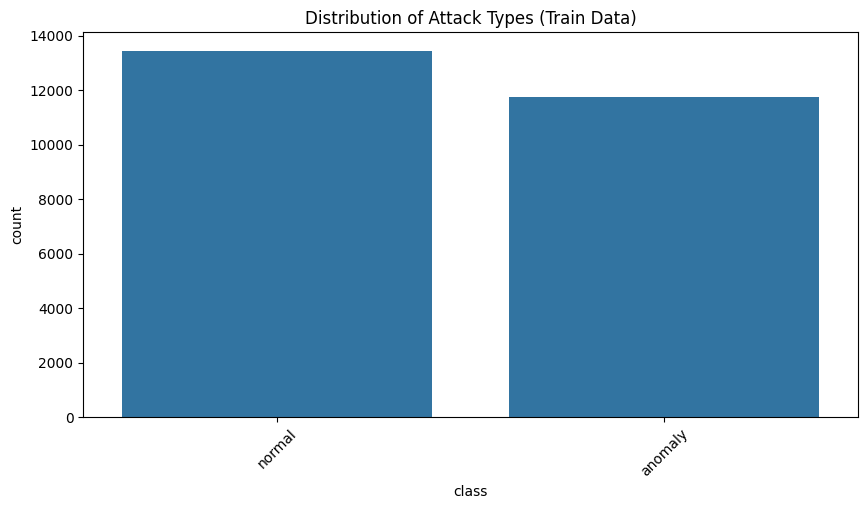

In [3]:
# Distribution of attack types
plt.figure(figsize=(10, 5))
sns.countplot(x='class', data=train)
plt.title("Distribution of Attack Types (Train Data)")
plt.xticks(rotation=45)
plt.show()

**D.Numerical Features Analysis**

In [4]:
# Describe numerical columns
numerical_cols = train.select_dtypes(include=['int64', 'float64']).columns
train[numerical_cols].describe().T

,count,mean,std,min,25%,50%,75%,max
duration,25192.0,305.054104,2.686556e+03,0.0,0.00,0.00,0.00,42862.0
src_bytes,25192.0,24330.628215,2.410805e+06,0.0,0.00,44.00,279.00,381709090.0
dst_bytes,25192.0,3491.847174,8.883072e+04,0.0,0.00,0.00,530.25,5151385.0
land,25192.0,0.000079,8.909946e-03,0.0,0.00,0.00,0.00,1.0
wrong_fragment,25192.0,0.023738,2.602208e-01,0.0,0.00,0.00,0.00,3.0
urgent,25192.0,0.000040,6.300408e-03,0.0,0.00,0.00,0.00,1.0
hot,25192.0,0.198039,2.154202e+00,0.0,0.00,0.00,0.00,77.0
num_failed_logins,25192.0,0.001191,4.541818e-02,0.0,0.00,0.00,0.00,4.0
logged_in,25192.0,0.394768,4.888105e-01,0.0,0.00,0.00,1.00,1.0
num_compromised,25192.0,0.227850,1.041735e+01,0.0,0.00,0.00,0.00,884.0


**E.Categorical Features Analysis**

In [5]:
categorical_cols = train.select_dtypes(include=['object']).columns.drop('class')
for col in categorical_cols:
    print(f"\n--- {col} ---")
    print(train[col].value_counts())


--- protocol_type ---
protocol_type
tcp     20526
udp      3011
icmp     1655
Name: count, dtype: int64

--- service ---
service
http         8003
private      4351
domain_u     1820
smtp         1449
ftp_data     1396
             ... 
urh_i           4
pm_dump         3
red_i           3
tim_i           2
http_8001       1
Name: count, Length: 66, dtype: int64

--- flag ---
flag
SF        14973
S0         7009
REJ        2216
RSTR        497
RSTO        304
S1           88
SH           43
RSTOS0       21
S2           21
S3           15
OTH           5
Name: count, dtype: int64


**F.Correlation Heatmap**

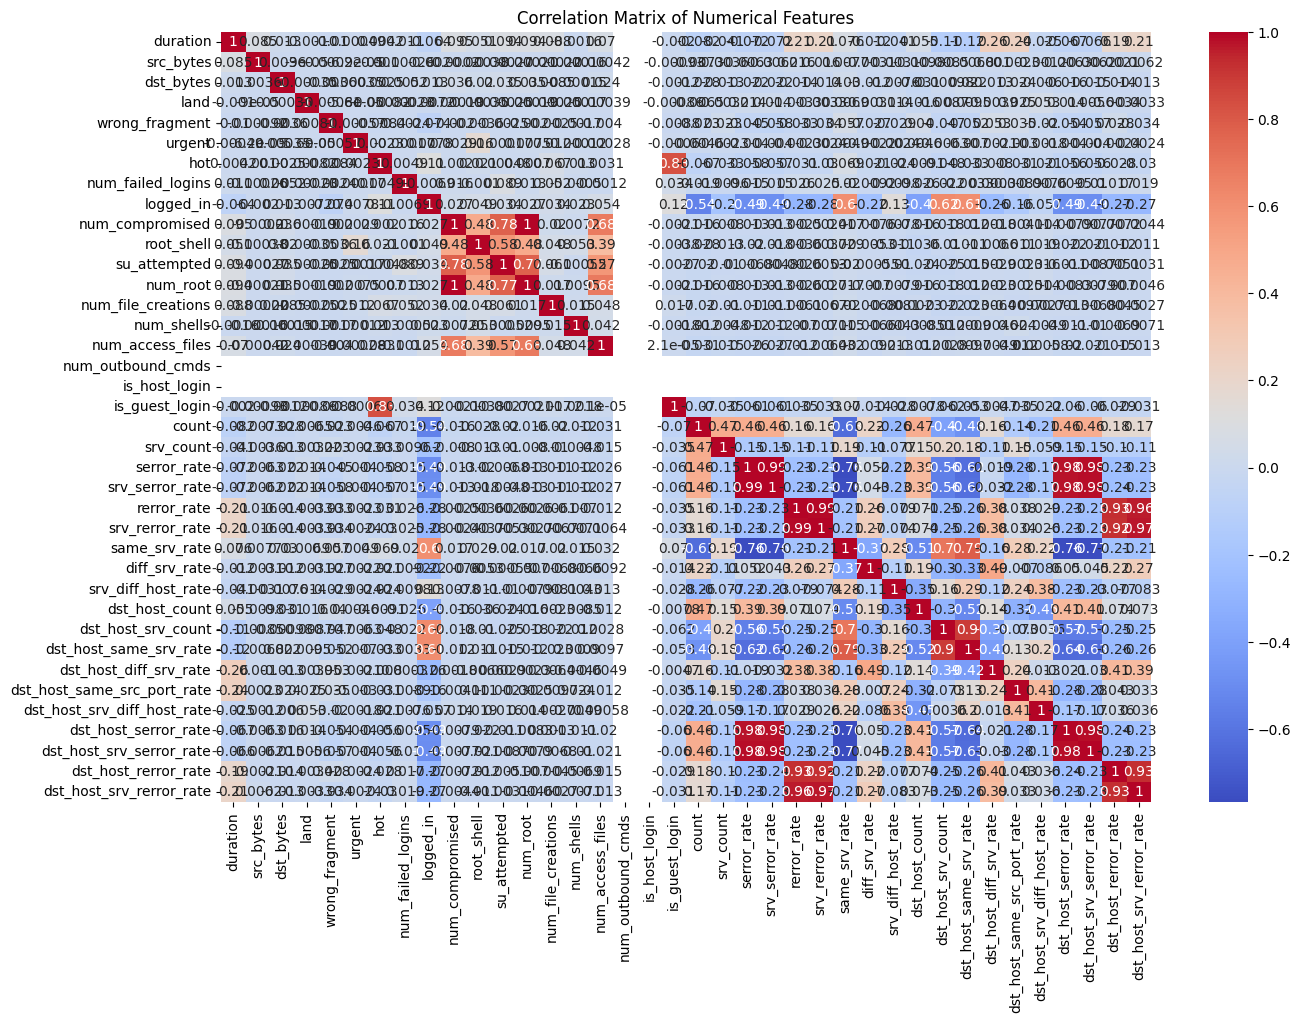

In [6]:
plt.figure(figsize=(15, 10))
sns.heatmap(train[numerical_cols].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix of Numerical Features")
plt.show()